# pd.cut / pd.qcut : 범주 나누기
pd.cut과 pd.qcut으로 수치형 변수를 구간으로 나눈 범주형 레이블을 생성<br>
1. pd.cut : 데이터를 동일한 길이로 나눔
2. pd.qcut : 데이터를 동일한 갯수로 나눔

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 타이타닉 데이터 불러오기!
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1. pd.cut 함수 사용
cut함수의 사용방법은 [데이터, 구간의 갯수, 레이블명]에 해당하는 인자값을 지정해주는 것이다. labels를 지정하지 않으면 구간의 나눈 기준이 레이블 명으로 된다.

In [8]:
# pd.cut으로 나눈 구간 데이터인 'age_class' column 생성
titanic['age_class'] = pd.cut(titanic['age'], 3, labels=['child','young','old'])
titanic[['age','age_class']].head()

,age,age_class
0,22.0,child
1,38.0,young
2,26.0,child
3,35.0,young
4,35.0,young


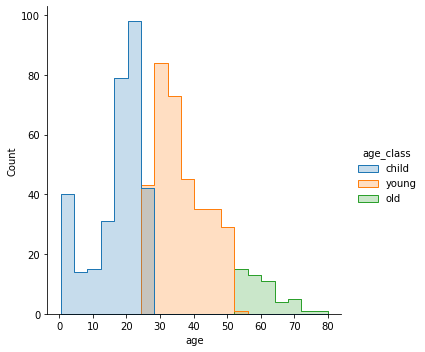

In [9]:
sns.displot(titanic, x='age', hue='age_class', element='step')

In [11]:
# 계층별 분포 확인
titanic['age_class'].value_counts()

young    345
child    319
old       50
Name: age_class, dtype: int64

In [13]:
# 계층별 생존률
titanic.groupby('age_class')['survived'].mean()

age_class
child    0.407524
young    0.417391
old      0.320000
Name: survived, dtype: float64

## 2. pd.qcut 함수 사용
qcut는 cut함수와 동일하게 [데이터, 구간의 갯수, 레이블명]에 해당하는 인자값을 지정해주면되고 동일한 갯수로 구간을 나누는 함수이다.

In [14]:
titanic = sns.load_dataset('titanic')
titanic['age_class2'] = pd.qcut(titanic['age'], 3, labels=['child','young','old'])

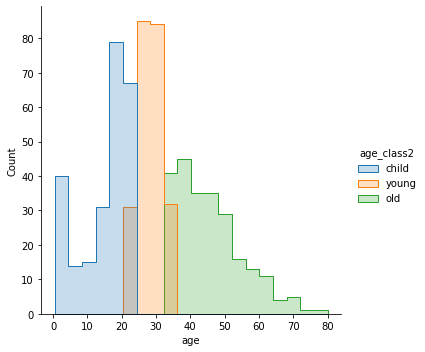

In [15]:
sns.displot(titanic, x='age', hue='age_class2', element='step')

In [17]:
# qcut으로 동일한 갯수로 구간을 나눔
titanic['age_class2'].value_counts()

child    246
old      236
young    232
Name: age_class2, dtype: int64

In [19]:
# 동일한 갯수로 나눈 구간 별 생존률
titanic.groupby('age_class2')['survived'].mean()

age_class2
child    0.418699
young    0.400862
old      0.398305
Name: survived, dtype: float64